1. Instalasi dan Impor Pustaka

Langkah:
Pastikan pustaka Python yang dibutuhkan (OpenCV, NumPy, dan Matplotlib) terinstal.
OpenCV digunakan untuk manipulasi dan analisis gambar.
NumPy digunakan untuk manipulasi data numerik.
Matplotlib digunakan untuk visualisasi hasil.

In [9]:
!pip install opencv-python-headless matplotlib numpy

2. Membaca dan Mengonversi Gambar

Tujuan: Membaca gambar dari path file, lalu mengonversinya menjadi format grayscale. Format grayscale mempermudah analisis dengan mengurangi dimensi warna (RGB) menjadi satu kanal (intensitas warna abu-abu).


Proses:
- cv2.imread() membaca gambar.
- cv2.cvtColor() mengonversi gambar ke grayscale.

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path ke gambar
image_path = '/content/WIN_20240627_13_59_47_Pro.jpg'  # Ganti dengan path gambar Anda

# Fungsi untuk membaca gambar dan mengubah ke format grayscale
def read_and_convert_image(image_path):
    # Membaca gambar
    img = cv2.imread(image_path)
    # Konversi ke skala abu-abu
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img, gray_img



3. Deteksi Tepi dengan Algoritma Canny

Tujuan: Menemukan tepi (edge) dalam gambar berdasarkan perubahan intensitas warna menggunakan algoritma Canny.

Proses:
- cv2.Canny() menerima gambar grayscale dan dua parameter ambang batas (lower_threshold dan upper_threshold) untuk mendeteksi perubahan intensitas piksel yang signifikan.
- Parameter ini dapat disesuaikan untuk mendapatkan hasil optimal sesuai dengan tingkat detail gambar.

In [11]:
# Fungsi untuk mendeteksi tepi menggunakan Canny
def detect_edges(gray_img, lower_threshold=50, upper_threshold=150):
    edges = cv2.Canny(gray_img, lower_threshold, upper_threshold)
    return edges



4. Menemukan dan Menganalisis Kontur

Tujuan: Mengidentifikasi kontur dalam gambar berdasarkan tepi yang ditemukan, lalu menganalisis properti setiap kontur.

Proses:
- cv2.findContours() menemukan semua kontur dalam gambar hasil deteksi tepi.
- Analisis dilakukan untuk menghitung:
 - Area: Menggunakan cv2.contourArea().
 - Bounding Box: Menggunakan cv2.boundingRect().
 - Centroid: Titik pusat dari bounding box dihitung sebagai (x + w // 2, y + h // 2)


In [12]:
# Fungsi untuk menemukan dan menganalisis kontur
def find_and_analyze_contours(edges):
    # Menemukan kontur
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_data = []
    for contour in contours:
        # Menghitung luas dan koordinat bounding box
        area = cv2.contourArea(contour)
        x, y, w, h = cv2.boundingRect(contour)
        contour_data.append({
            "Area": area,
            "Bounding Box": (x, y, w, h),
            "Centroid": (x + w // 2, y + h // 2)
        })
    return contours, contour_data

5. Menggambar Kontur pada Gambar Asli

Tujuan: Menampilkan kontur yang ditemukan dengan menggambar di atas gambar asli untuk visualisasi.

Proses:
- cv2.drawContours() menggambar semua kontur dengan warna hijau dan ketebalan garis tertentu.

In [13]:
# Fungsi untuk menggambar kontur pada gambar asli
def draw_contours(img, contours):
    result_img = img.copy()
    cv2.drawContours(result_img, contours, -1, (0, 255, 0), 2)  # Hijau untuk kontur
    return result_img


6. buat dan jalankan fungsi process yang menampung semua program

---



In [14]:
# Fungsi utama untuk deteksi dan analisis
def process_image(image_path):
    img, gray_img = read_and_convert_image(image_path)
    edges = detect_edges(gray_img)
    contours, contour_data = find_and_analyze_contours(edges)
    result_img = draw_contours(img, contours)
    return result_img, edges, contour_data, contours # Return contours here

# Proses gambar
original_img, gray_img = read_and_convert_image(image_path)
result_img, edges, contour_data, contours = process_image(image_path) # Assign contours here

7. Visualisasi Hasil

Tujuan: Menampilkan gambar asli, gambar hasil deteksi tepi, dan gambar dengan kontur untuk membantu pengguna memahami hasil analisis.

Proses:
plt.subplot() membagi tampilan menjadi tiga bagian untuk visualisasi gambar secara paralel.

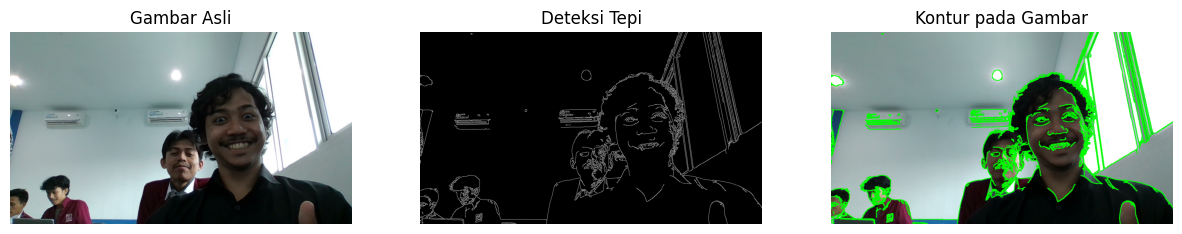

In [15]:
# fungsi Visualisasi
def visualize_results(img, edges, result_img):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Gambar Asli")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(edges, cmap="gray")
    plt.title("Deteksi Tepi")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.title("Kontur pada Gambar")
    plt.axis("off")

    plt.show()

# Visualisasi hasil
visualize_results(original_img, edges, result_img)

8. Informasi Analisis

Tujuan: Menampilkan properti kontur yang ditemukan, seperti:

- Jumlah objek dalam gambar.
- Area: Luas tiap objek.
- Bounding Box: Koordinat (x, y) dan dimensi (w, h).
- Centroid: Titik pusat tiap objek.

In [16]:
# Menampilkan informasi objek
print(f"Jumlah objek terdeteksi: {len(contours)}")
print("Informasi tiap objek:")
for i, data in enumerate(contour_data):
    print(f"Objek {i + 1}:")
    print(f"  - Area: {data['Area']:.2f}")
    print(f"  - Bounding Box (x, y, w, h): {data['Bounding Box']}")
    print(f"  - Centroid: {data['Centroid']}")

Jumlah objek terdeteksi: 377
Informasi tiap objek:
Objek 1:
  - Area: 107.00
  - Bounding Box (x, y, w, h): (304, 714, 58, 6)
  - Centroid: (333, 717)
Objek 2:
  - Area: 0.00
  - Bounding Box (x, y, w, h): (0, 712, 7, 2)
  - Centroid: (3, 713)
Objek 3:
  - Area: 0.00
  - Bounding Box (x, y, w, h): (473, 705, 3, 15)
  - Centroid: (474, 712)
Objek 4:
  - Area: 0.50
  - Bounding Box (x, y, w, h): (472, 705, 2, 2)
  - Centroid: (473, 706)
Objek 5:
  - Area: 0.00
  - Bounding Box (x, y, w, h): (11, 704, 1, 1)
  - Centroid: (11, 704)
Objek 6:
  - Area: 5.00
  - Bounding Box (x, y, w, h): (212, 703, 3, 4)
  - Centroid: (213, 705)
Objek 7:
  - Area: 0.50
  - Bounding Box (x, y, w, h): (100, 703, 57, 4)
  - Centroid: (128, 705)
Objek 8:
  - Area: 3.50
  - Bounding Box (x, y, w, h): (0, 703, 7, 6)
  - Centroid: (3, 706)
Objek 9:
  - Area: 1.00
  - Bounding Box (x, y, w, h): (0, 695, 10, 3)
  - Centroid: (5, 696)
Objek 10:
  - Area: 2.50
  - Bounding Box (x, y, w, h): (20, 688, 9, 9)
  - Centroid